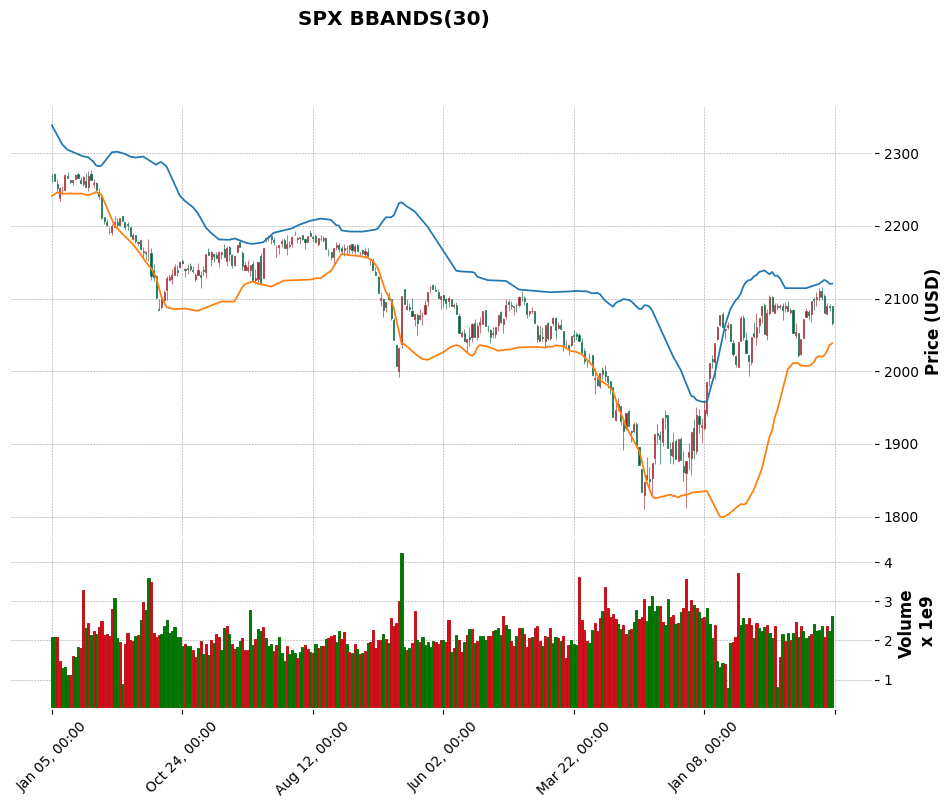

In [3]:
import pandas as pd
from finta import TA
import mplfinance as mpf
from pandas_datareader import data as web

# Get the data from remote source
data = web.DataReader('^SPX', 'stooq')
# Finta likes lowercase
data.columns = ["open", "high", "low", "close", "volume"]

# calc bol band
bbands = TA.BBANDS(data, 30)

# cherry pick what to show on the chart
bands_plot = pd.concat([bbands.BB_UPPER, bbands.BB_LOWER], axis=1)

apd = mpf.make_addplot(bands_plot.tail(300))

mpf.plot(data.tail(300), type='candle', style='charles',
        title='SPX BBANDS(30)',
        ylabel='Price (USD)',
        ylabel_lower='Volume',
        volume=True,
        figscale=1.5,
        addplot=apd
        )
